In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
import matplotlib.pyplot as plt
import torch
import pandas as pd
import glob

# "/home/conda/DATASETS_OUTSIDE/DATASETS/hardhat/train/_annotations.csv"
# root = "/home/lilong/HDD_3tb/DATASETS_OUTSIDE/DATASETS/hardhat"
root = "/home/conda/RAID_5_14TB/DATASETS/hardhat"
labels = pd.read_csv(root+"/train/_annotations.csv")
labels[["xmin","ymin","xmax","ymax"]] = labels[["xmin","ymin","xmax","ymax"]]/labels[["width","height","width","height"]].values
filenames = labels["filename"]
file_directories = [f"{root}/train/{x}" for x in filenames]
class_uniques = labels["class"].unique()
class2int = {v:k for k,v in enumerate(class_uniques)}
int2class = {v:k for k,v in class2int.items()}

labels["class"] = labels["class"].apply(lambda x: class2int[x])

labels

,filename,width,height,class,xmin,ymin,xmax,ymax
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.602000,0.266667,0.660000,0.360000
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.680000,0.322667,0.740000,0.421333
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.398000,0.296000,0.446000,0.365333
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.554000,0.290667,0.590000,0.352000
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.308000,0.309333,0.348000,0.376000
...,...,...,...,...,...,...,...,...
20226,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.496000,0.210227,0.580000,0.372159
20227,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.240000,0.204545,0.304000,0.323864
20228,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.576000,0.198864,0.634000,0.301136
20229,004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7...,640,510,1,0.653125,0.135294,0.998437,0.574510


301.0 100.0 330.0 135.0
340.0 121.0 370.0 158.0
199.0 111.0 223.0 137.0
277.0 109.0 295.0 132.0
154.0 116.0 174.0 141.0
131.0 119.00000000000001 150.0 141.0
122.0 119.00000000000001 133.0 136.0
180.0 120.0 195.0 138.0


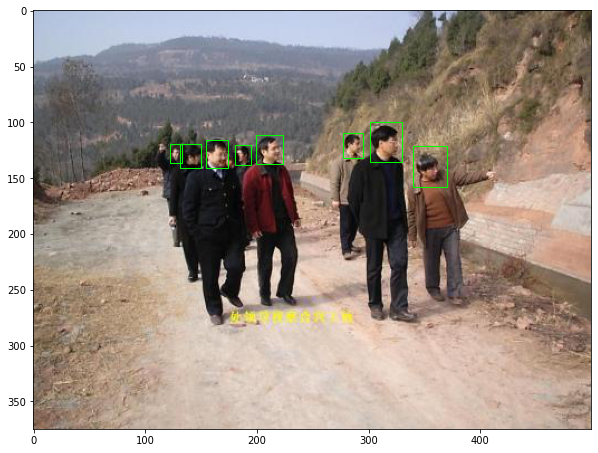

In [2]:
import PIL.Image as Image

file_idx = filenames[0]
label_idx = labels[labels["filename"]==file_idx]
img = Image.open(file_directories[0]).convert("RGB")
img = np.asarray(img.resize((500,375)))
# img = torch.as_tensor(np.asarray(img.resize((500,375)))).permute(2,0,1)

fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(img)

for i,label in label_idx[["xmin","ymin","xmax","ymax"]].iterrows():
    label = label.values * np.array([[500,375,500,375]])
    xmin,ymin,xmax,ymax = label[0]
    print(xmin,ymin,xmax,ymax)

    rect = plt.Rectangle((xmin,ymin),xmax-xmin,ymax-ymin,fill=False,color=(0,1,0))
    ax.add_patch(rect)
    
plt.show()

In [3]:
labels["bh"] = (labels["ymax"]-labels["ymin"])
labels["bw"] = (labels["xmax"]-labels["xmin"])
labels["cx"] = (labels["xmin"]+labels["bw"]/2)
labels["cy"] = (labels["ymin"]+labels["bh"]/2)
labels

,filename,width,height,class,xmin,ymin,xmax,ymax,bh,bw,cx,cy
0,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.602000,0.266667,0.660000,0.360000,0.093333,0.058000,0.631000,0.313333
1,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.680000,0.322667,0.740000,0.421333,0.098667,0.060000,0.710000,0.372000
2,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.398000,0.296000,0.446000,0.365333,0.069333,0.048000,0.422000,0.330667
3,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.554000,0.290667,0.590000,0.352000,0.061333,0.036000,0.572000,0.321333
4,004858_jpg.rf.002ab521984d81c7400faa6f916f5a01...,500,375,0,0.308000,0.309333,0.348000,0.376000,0.066667,0.040000,0.328000,0.342667
...,...,...,...,...,...,...,...,...,...,...,...,...
20226,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.496000,0.210227,0.580000,0.372159,0.161932,0.084000,0.538000,0.291193
20227,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.240000,0.204545,0.304000,0.323864,0.119318,0.064000,0.272000,0.264205
20228,002219_jpg.rf.ff42125c486dacdf0b881197b5500215...,500,352,1,0.576000,0.198864,0.634000,0.301136,0.102273,0.058000,0.605000,0.250000
20229,004208_jpg.rf.ff41745f0340f82a1b3d76d669e084a7...,640,510,1,0.653125,0.135294,0.998437,0.574510,0.439216,0.345313,0.825781,0.354902


In [5]:
import seaborn as sns
from sklearn.cluster import KMeans,SpectralClustering
N_anchors = 1
N_scales = 3

In [6]:
X = labels[["bw","bh"]].values.reshape(-1,2)
kmeans = KMeans(n_clusters=N_anchors*N_scales).fit(X)
# kmeans = SpectralClustering(n_clusters=N_anchors*N_scales).fit(X)

In [7]:
cluster_centers = kmeans.cluster_centers_
cluster_centers.sort()
print(cluster_centers.shape)
cluster_centers[::-1]

(3, 2)


array([[0.14476641, 0.23776138],
       [0.30545814, 0.54887088],
       [0.05884518, 0.09849377]])

In [11]:
clusters_dic = {"anchor_boxes":cluster_centers,"N_anchors":N_anchors,"N_scales":N_scales}
np.save("cluster_hardhat_3scales_1anchor.npy",clusters_dic)

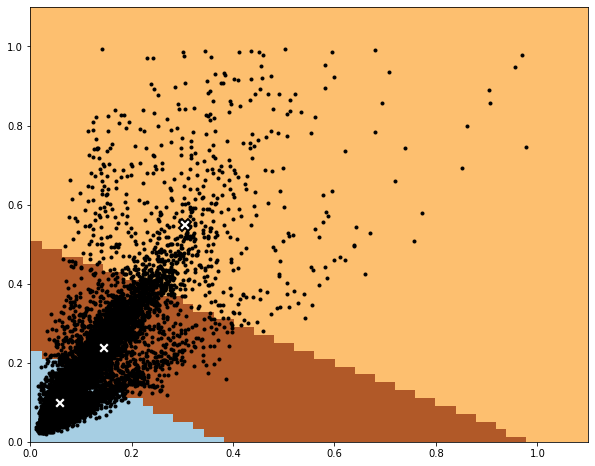

In [9]:
fig,ax = plt.subplots(1,1,figsize=(10,8))

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

# plt.clf()
ax.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)


ax.plot(X[:,0],X[:,1],".k")
ax.plot(cluster_centers[:,0],cluster_centers[:,1],"wX", markersize=12,markeredgewidth=2,markeredgecolor="k")
ax.set_xlim([0,1.1])
ax.set_ylim([0,1.1])
plt.show()

(-0.5, 0.5)

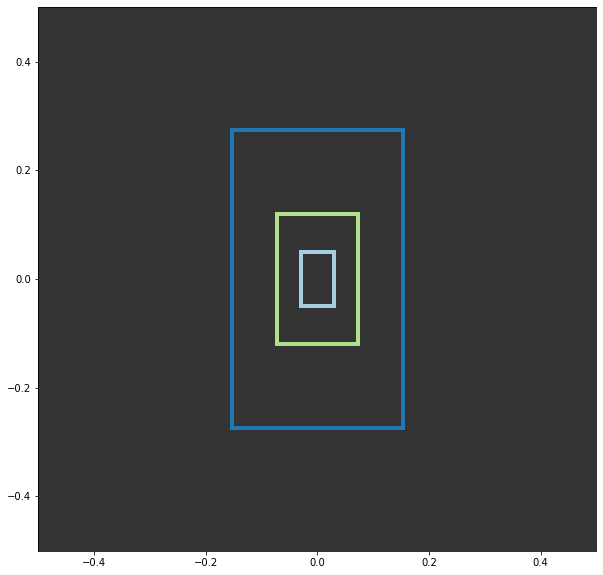

In [10]:
fig,ax = plt.subplots(1,1,figsize=(10,10))

for (w,h),c in zip(cluster_centers,plt.cm.Paired.colors):
    mx,my = 0-w/2,0-h/2
    rect = plt.Rectangle((mx,my),w,h,fill=False,color = c,linewidth=4)
    ax.add_artist(rect)
ax.set_facecolor((0.2,0.2,0.2))
plt.xlim([-0.5,0.5])
plt.ylim([-0.5,0.5])

In [65]:
plt.cm.Paired.colors

((0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392))